# Traditional Based Image Segmentation 
This Jupyter Notebook illustrates different traditional image segmentation techniques, including threshold-based, edge-based, and clustering-based segmentation.

In [1]:
# Importing the useful libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read and Display the Original Image
### Convert the Image to Grayscale
In this step, we will load the image and convert it to grayscale to prepare it for the image segmentation techniques.

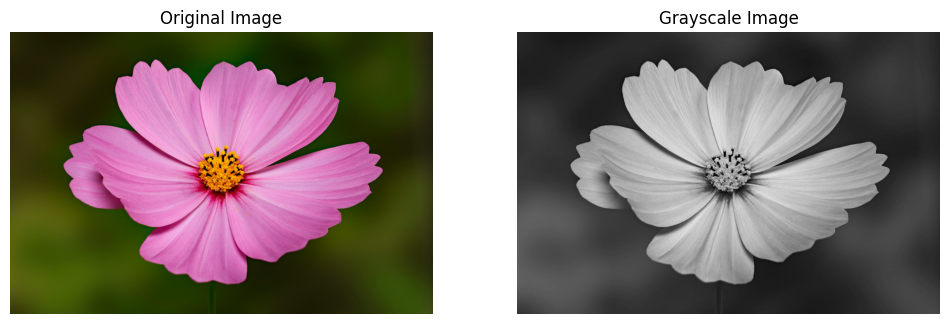

In [8]:
# Load the image
image_path = 'Flower.jpg'  # Update this to your image's path
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the grayscale image
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

# Show the images
plt.show()

## 1. Threshold-based Segmentation: Global Thresholding
Threshold-based techniques segment an image by converting it to a binary image based on a predefined intensity threshold, separating pixels into foreground and background.

In [4]:
# Global thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Segmented Image')
plt.show()

### Experiment with Different Threshold Values
You can change the threshold value to see the difference in the segmentation result. Try different values and observe how the segmented image changes.

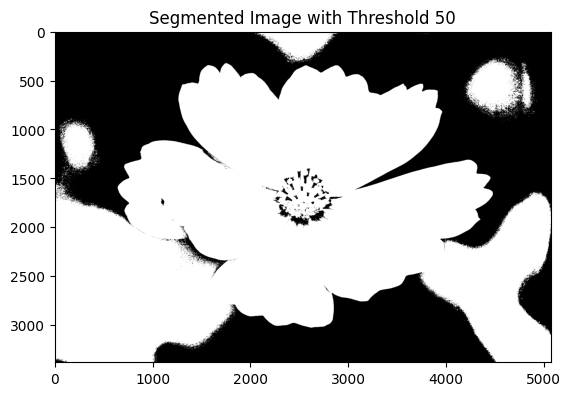

In [10]:
# Global thresholding
#Change the threshold value
threshold_value = 50  # Change this value to experiment with different thresholds

# Apply global thresholding with the new threshold value
_, thresholded_image_custom = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the thresholded image with the new threshold value
plt.imshow(thresholded_image_custom, cmap='gray')
plt.title(f'Segmented Image with Threshold {threshold_value}')
plt.show()

### Note:
- Change the `threshold_value` variable to different values (e.g., 50, 150, 200) and run the code to see how the segmentation changes.
- Observe the differences in the segmented images and understand how the choice of threshold value affects the results.


## 2. Clustring-based Segmentation: K-means 
K-means segmentation clusters pixels in the image into K clusters based on their color intensity. 

In [11]:
# K-means clustering 
# Convert image to float and reshape for k-means
Z = image_rgb.reshape((-1,3))
Z = np.float32(Z)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 2 # Number of clusters
_, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to image original size
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((image_rgb.shape))

# Display the result
plt.imshow(result_image)
plt.title('K-Means Segmentation')
plt.show()

### Experiment with Different K Values
You can change the number of clusters 𝐾 to see the difference in the segmentation result. Try different values and observe how the segmented image changes.

In [12]:
# Ask the student to change the K value
K_custom = 4  # Change this value to experiment with different number of clusters

# Apply K-means clustering with the new K value
_, label_custom, center_custom = cv2.kmeans(Z, K_custom, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to image original size
center_custom = np.uint8(center_custom)
res_custom = center_custom[label_custom.flatten()]
result_image_custom = res_custom.reshape((image_rgb.shape))

# Display the result with the new K value
plt.imshow(result_image_custom)
plt.title(f'K-Means Segmentation with K={K_custom}')
plt.axis('off')
plt.show()


### Note:
- Change the `K_custom` variable to different values (e.g., 3, 5, 10) and run the code to see how the segmentation changes.
- Observe the differences in the segmented images and understand how the choice of \( K \) affects the results.


## 3. Edge-Based Segmentation: Canny
Edge-based segmentation identifies object boundaries within images based on abrupt changes in intensity. The Canny edge detector is a popular method for this approach.

In [6]:
# Example of edge-based segmentation using Canny edge detection
edges = cv2.Canny(gray_image, 0, 50)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge-Based Segmentation')
plt.show()

### Experiment with Different Threshold Values
You can change the threshold values for the Canny edge detection to see the difference in the edge detection result. Try different values and observe how the edge detection changes.

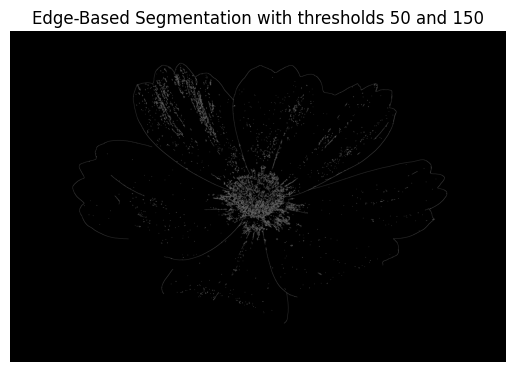

In [13]:
# Ask the student to change the threshold values
threshold1 = 50  # Change this value to experiment with different thresholds
threshold2 = 150  # Change this value to experiment with different thresholds

# Apply Canny edge detection with the new threshold values
edges_custom = cv2.Canny(gray_image, threshold1, threshold2)

# Display the result with the new threshold values
plt.imshow(edges_custom, cmap='gray')
plt.title(f'Edge-Based Segmentation with thresholds {threshold1} and {threshold2}')
plt.axis('off')
plt.show()

### Note:
- Change the `threshold1` and `threshold2` variables to different values (e.g., 0, 50, 100, 200) and run the code to see how the edge detection changes.
- Observe the differences in the edge-detected images and understand how the choice of threshold values affects the results.
